In [1]:
import copy

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import pooch

from fair import FAIR
from fair.io import read_properties
from fair.interface import initialise, fill

In [2]:
f = FAIR()

In [3]:
f.define_time(1750, 2100, 1)

In [4]:
f.define_scenarios(['ssp126'])

In [5]:
pd.options.display.max_columns = 50
fair_params_df = pd.read_csv('../data/fair2.1-parameters/ar6_calibration_ebm3.csv', index_col=0)
fair_params_df

,gamma,c1,c2,c3,kappa1,kappa2,kappa3,epsilon,sigma_eta,sigma_xi,F_4xCO2,r0,rU,rT,rA,ari BC,ari CH4,ari N2O,ari NH3,ari NOx,ari OC,ari Sulfur,ari VOC,ari Equivalent effective stratospheric chlorine,shape_so2,shape_bcoc,beta,o3 CH4,o3 N2O,o3 Equivalent effective stratospheric chlorine,o3 CO,o3 VOC,o3 NOx,scale CH4,scale N2O,scale minorGHG,scale Stratospheric water vapour,scale Contrails,scale Light absorbing particles on snow and ice,scale Land use,scale Volcanic,solar_amplitude,solar_trend,co2_concentration_1750
850,4.376497,5.043174,19.816943,98.372101,0.669129,3.161464,1.480842,1.572382,0.621082,0.352119,6.228445,36.694174,-0.000192,0.013848,0.003730,0.031134,-2.621079e-06,-0.000058,-0.000588,-0.000020,-0.000501,-0.000591,-0.000029,-0.000011,1.465927e+02,2.143949e+01,2.781219,0.000164,0.000666,-0.000206,0.000254,0.000027,0.001409,1.160193,0.863080,0.998321,1.846416,0.978700,0.751700,1.438944,0.981293,1.242977,-0.015381,279.700737
1154,2.305604,3.457317,16.036699,81.536962,0.939680,2.028406,0.838075,0.934857,0.487339,0.405962,7.420274,36.296985,-0.000751,4.317360,0.001781,0.018473,-9.181077e-07,-0.000045,-0.000292,-0.000067,-0.007582,-0.000210,-0.000024,-0.000005,1.607689e+05,1.998226e+04,988.634728,0.000181,0.000620,-0.000083,-0.000018,0.000226,0.001404,1.208912,1.060738,1.088391,1.488845,1.008968,0.866052,1.171559,1.048266,0.337513,-0.048375,278.386730
1715,19.036026,4.578325,20.142983,77.559840,1.642568,4.079575,1.361092,1.749377,1.783890,0.523639,9.163367,30.726681,0.005044,2.388184,0.001688,0.036803,-1.191549e-06,-0.000019,-0.000353,-0.000005,-0.002669,-0.003975,-0.000009,-0.000005,4.995517e+01,1.644202e+02,0.064437,0.000150,0.000938,-0.000112,0.000125,0.000257,0.001737,1.157729,1.157514,0.976600,1.376143,1.109082,-0.312904,0.596416,0.563200,0.634693,0.013449,279.909140
1986,2.743151,4.437667,6.084703,197.147722,2.280844,3.954506,1.181432,1.129789,0.783854,0.482319,11.170946,34.225526,0.004651,3.566573,0.000155,0.022256,-1.497475e-06,-0.000017,-0.001034,-0.000018,-0.005467,-0.002924,-0.000002,-0.000001,8.715455e+02,5.613678e+01,0.519395,0.000180,0.001234,-0.000211,0.000213,0.000568,0.002890,0.893812,0.907722,1.185079,1.253095,0.685663,1.110554,1.260463,0.904838,1.371924,-0.000664,275.701766
2015,6.255757,3.464060,16.080617,196.215771,1.613268,1.708449,0.317494,0.353546,1.014272,0.493755,6.870205,32.047906,0.002982,2.968583,0.002043,0.010985,-1.426771e-06,-0.000003,-0.000411,-0.000082,-0.000243,-0.002432,-0.000008,-0.000013,1.951228e+07,3.241988e+06,103647.224076,0.000221,0.000808,-0.000006,0.000254,0.000142,0.000607,1.028285,0.990008,1.066302,1.025822,0.673421,0.812151,0.750140,0.871998,1.060227,-0.002683,281.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493183,1.816954,4.031557,39.566946,17.572127,2.029251,3.757016,1.571389,1.187835,1.200403,0.517379,9.430535,29.543110,0.005384,4.372750,0.001586,0.012974,-2.716214e-06,-0.000061,-0.000216,-0.000131,-0.004456,-0.000647,-0.000012,-0.000014,1.839260e+07,4.832343e+06,44006.699964,0.000168,0.000503,-0.000166,0.000219,0.000115,0.002125,1.114250,0.904158,1.213022,0.566851,1.457158,2.616567,0.549177,1.045369,0.481154,0.105021,278.520379
1494048,2.553197,6.368796,10.157751,95.801299,0.869270,3.356908,1.281073,1.708695,0.145371,0.432073,6.525073,28.059966,0.008589,6.518755,-0.002736,0.023406,-2.907988e-06,-0.000015,-0.000361,-0.000107,-0.001827,-0.001598,-0.000030,-0.000008,1.957809e+01,5.671479e+00,0.897845,0.000263,0.001225,-0.000031,0.000203,0.000184,0.001955,0.929534,0.942763,0.987129,2.175089,0.860819,1.266976,1.382469,1.058176,1.090448,0.016859,277.361188
1498147,2.672436,5.350462,38.413558,15.846094,1.872677,0.752623,1.146558,1.224077,0.476114,0.541798,7.619546,30.036914,0.006889,3.564225,0.001507,0.008798,-4.457174e-06,-0.000061,-0.000862,-0.000108,-0.002259,-0.004535,-0.000032,-0.000010,1.892194e+01,1.255987e+01,0.040238,0.000129,0.0

In [6]:
species, properties = read_properties()

In [7]:
f.define_species(species, properties)

In [8]:
[fair_params_df.index[0]]

[850]

In [9]:
f.define_configs([fair_params_df.index[0]])

In [10]:
f.allocate()

In [11]:
f.fill_from_rcmip()

In [12]:
ar6_forcing_file = pooch.retrieve(
    url="doi:10.5281/zenodo.5705391/table_A3.3_historical_ERF_1750-2019_best_estimate.csv",
    known_hash="md5:f64915777d2971c5eb5d96a432f45c48",
)

In [13]:
ar6_forcing_df = pd.read_csv(ar6_forcing_file, index_col=0)

In [14]:
volcanic_forcing = np.zeros(351)
volcanic_forcing[:270] = ar6_forcing_df['volcanic'].values
volcanic_forcing[269:281] = np.linspace(1, 0, 12) * volcanic_forcing[269]

In [15]:
solar_forcing=np.zeros(351)
solar_forcing_df = pd.read_csv('../data/forcing/solar_erf.csv', index_col=0)
solar_forcing = solar_forcing_df['solar_erf'].values[:351]

In [16]:
# Volcanic forcing
fill(f.forcing, volcanic_forcing[:, None, None] * fair_params_df.loc[fair_params_df.index[0], 'scale Volcanic'], specie='Volcanic')

# Solar forcing
trend_shape = np.ones(351)
trend_shape[:271] = np.linspace(0, 1, 271)

fill(f.forcing, 
     solar_forcing[:, None, None] * 
     fair_params_df.loc[fair_params_df.index[0], 'solar_amplitude'] + 
     trend_shape[:, None, None] * fair_params_df.loc[fair_params_df.index[0], 'solar_trend'],
     specie='Solar'
)

In [17]:
f.fill_species_configs()

In [18]:
# Climate response
fill(f.climate_configs['ocean_heat_capacity'], fair_params_df.loc[fair_params_df.index[0],'c1':'c3'])
fill(f.climate_configs['ocean_heat_transfer'], fair_params_df.loc[fair_params_df.index[0],'kappa1':'kappa3'])
fill(f.climate_configs['deep_ocean_efficacy'], fair_params_df.loc[fair_params_df.index[0],'epsilon'])
fill(f.climate_configs['sigma_eta'], fair_params_df.loc[fair_params_df.index[0],'sigma_eta'])
fill(f.climate_configs['sigma_xi'], fair_params_df.loc[fair_params_df.index[0],'sigma_xi'])
fill(f.climate_configs['gamma_autocorrelation'], fair_params_df.loc[fair_params_df.index[0],'gamma'])
fill(f.climate_configs['seed'], fair_params_df.index[0]*399 + 1355763)
fill(f.climate_configs['use_seed'], True)
fill(f.climate_configs['stochastic_run'], True)

# carbon cycle
fill(f.species_configs['iirf_0'], fair_params_df.loc[fair_params_df.index[0], 'r0'], specie='CO2')
fill(f.species_configs['iirf_airborne'], fair_params_df.loc[fair_params_df.index[0], 'rA'], specie='CO2')
fill(f.species_configs['iirf_uptake'], fair_params_df.loc[fair_params_df.index[0], 'rU'], specie='CO2')
fill(f.species_configs['iirf_temperature'], fair_params_df.loc[fair_params_df.index[0], 'rT'], specie='CO2')

# aerosol direct
for specie in ['BC', 'CH4', 'N2O', 'NH3', 'NOx', 'OC', 'Sulfur', 'VOC', 'Equivalent effective stratospheric chlorine']:
    fill(f.species_configs['erfari_radiative_efficiency'], fair_params_df.loc[fair_params_df.index[0], f'ari {specie}'], specie=specie)

# aerosol indirect
fill(f.species_configs['aci_parameters'], fair_params_df.loc[fair_params_df.index[0], 'beta'], aci_parameter='scale')
fill(f.species_configs['aci_parameters'], fair_params_df.loc[fair_params_df.index[0], 'shape_so2'], aci_parameter='Sulfur')
fill(f.species_configs['aci_parameters'], fair_params_df.loc[fair_params_df.index[0], 'shape_bcoc'], aci_parameter='BC+OC')

# ozone
for specie in ['CH4', 'N2O', 'Equivalent effective stratospheric chlorine', 'CO', 'VOC', 'NOx']:
    fill(f.species_configs['ozone_radiative_efficiency'], fair_params_df.loc[fair_params_df.index[0], f'o3 {specie}'], specie=specie)

# methane lifetime baseline
fill(f.species_configs['unperturbed_lifetime'], 10.4198121, specie='CH4')

# emissions adjustments for N2O and CH4 (we don't want to make these defaults as people might wanna run pulse expts with these gases)
fill(f.species_configs['baseline_emissions'], 19.019783117809567, specie='CH4')
fill(f.species_configs['baseline_emissions'], 0.08602230754, specie='N2O')

# forcing scaling

for specie in ['CH4', 'N2O', 'Stratospheric water vapour', 'Contrails', 'Light absorbing particles on snow and ice', 'Land use']:
    fill(f.species_configs['forcing_scale'], fair_params_df.loc[fair_params_df.index[0], f'scale {specie}'], specie=specie)
for specie in ['CFC-11', 'CFC-12', 'CFC-113', 'CFC-114', 'CFC-115', 'HCFC-22', 'HCFC-141b', 'HCFC-142b',
    'CCl4', 'CHCl3', 'CH2Cl2', 'CH3Cl', 'CH3CCl3', 'CH3Br', 'Halon-1211', 'Halon-1301', 'Halon-2402',
    'CF4', 'C2F6', 'C3F8', 'c-C4F8', 'C4F10', 'C5F12', 'C6F14', 'C7F16', 'C8F18', 'NF3', 'SF6', 'SO2F2',
    'HFC-125', 'HFC-134a', 'HFC-143a', 'HFC-152a', 'HFC-227ea', 'HFC-23', 'HFC-236fa', 'HFC-245fa', 'HFC-32',
    'HFC-365mfc', 'HFC-4310mee']:
    fill(f.species_configs['forcing_scale'], fair_params_df.loc[fair_params_df.index[0], 'scale minorGHG'], specie=specie)

calibrated_f4co2_mean = 7.866801427264765
fill(f.species_configs['forcing_scale'], 1 + 0.561*(calibrated_f4co2_mean - fair_params_df.loc[fair_params_df.index[0],'F_4xCO2'])/calibrated_f4co2_mean, specie='CO2')


# tune down volcanic efficacy
fill(f.species_configs['forcing_efficacy'], 0.6, specie='Volcanic')


# initial condition of CO2 concentration (but not baseline for forcing calculations)
fill(f.species_configs['baseline_concentration'], fair_params_df.loc[fair_params_df.index[0], 'co2_concentration_1750'], specie='CO2')

f.ch4_method='Thornhill2021'

In [19]:
initialise(f.concentration, f.species_configs['baseline_concentration'])
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.airborne_emissions, 0)
initialise(f.cumulative_emissions, 0)

In [20]:
f.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

In [21]:
g = copy.deepcopy(f)
#fill(g.concentration, np.nan)
initialise(g.concentration, g.species_configs['baseline_concentration'])
initialise(g.forcing, 0)
initialise(g.temperature, 0)
initialise(g.airborne_emissions, 0)
initialise(g.cumulative_emissions, 0)
initialise(g.alpha_lifetime, 1)
initialise(g.gas_partitions, np.array([0, 0, 0, 0]))

g.emissions[272:302, 0, 0, 3] = np.linspace(f.emissions[272, 0, 0, 3].values, -180, 30)
g.emissions[302:, 0, 0, 3] = -180
g.run()

Running 1 projections in parallel:   0%|          | 0/350 [00:00<?, ?timesteps/s]

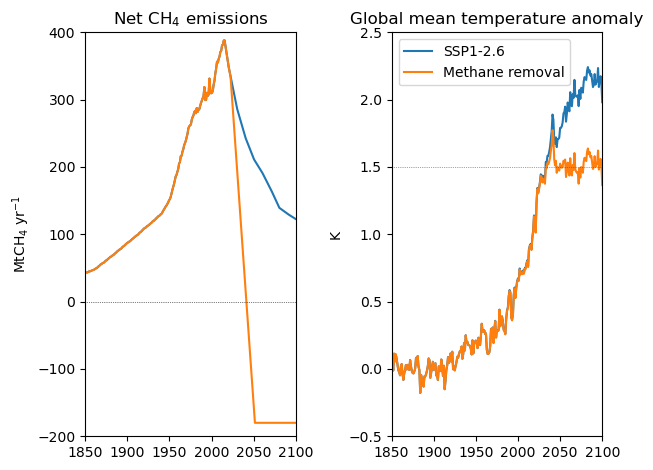

In [22]:
fig, ax = pl.subplots(1, 2, squeeze=True)
ax[0].plot(f.timepoints, f.emissions[:, 0, :, 3]);
ax[0].plot(g.timepoints, g.emissions[:, 0, :, 3]);
ax[0].axhline(0, color='k', lw=0.5, ls=':')
ax[0].set_xlim(1850, 2100)
ax[0].set_ylim(-200, 400)
ax[0].set_title("Net CH$_4$ emissions")
ax[0].set_ylabel("MtCH$_4$ yr$^{-1}$")

ax[1].plot(f.timebounds, f.temperature[:, 0, :, 0] - f.temperature[100:151, 0, :, 0].mean(axis=0), label='SSP1-2.6');
ax[1].plot(g.timebounds, g.temperature[:, 0, :, 0] - g.temperature[100:151, 0, :, 0].mean(axis=0), label='Methane removal');
ax[1].axhline(1.5, color='r', lw=0.5, ls=':')
ax[1].set_xlim(1850, 2100)
ax[1].set_ylim(-.5, 2.5)
ax[1].set_title("Global mean temperature anomaly")
ax[1].set_ylabel("K")
ax[1].legend()

fig.tight_layout()

In [23]:
np.sum(g.emissions[:, 0, 0, 3] - f.emissions[:, 0, 0, 3])

<xarray.DataArray ()>
array(-21750.02101244)
Coordinates:
    scenario  <U6 'ssp126'
    config    int64 850
    specie    <U43 'CH4'

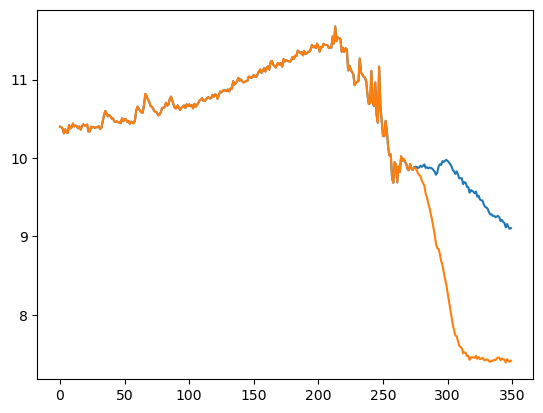

In [24]:
pl.plot(f.alpha_lifetime[:,0,0,3] * 10.4)
pl.plot(g.alpha_lifetime[:,0,0,3] * 10.4)

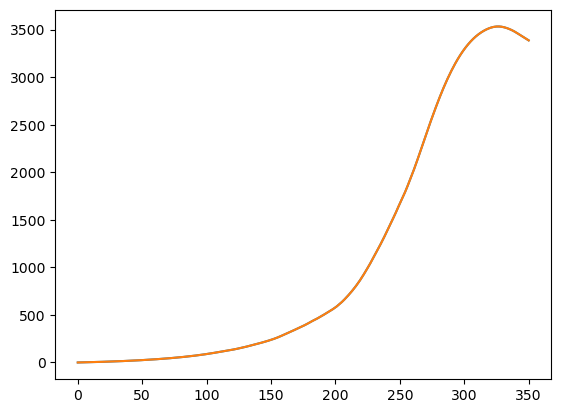

In [25]:
pl.plot(f.cumulative_emissions[:,0,0,2])
pl.plot(g.cumulative_emissions[:,0,0,2])